In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df = pd.read_csv('merged.csv')
X = df.drop(columns=['Price(Float)'])
y = df['Price(Float)']


Label_encoder = LabelEncoder()
nominal_cols = ['Face','Address','City']
transformer = ColumnTransformer([('one_hot_encoder',OneHotEncoder(drop='first'),nominal_cols)],remainder='passthrough')

X_encoded = transformer.fit_transform(X)

# # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1)

regressor = RandomForestRegressor(n_estimators=100, random_state=0)

In [26]:
model = regressor.fit(X_encoded, y)

y_pred = model.predict(X_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 30794737004351.477
Root Mean Squared Error (RMSE): 5549300.58695251
Mean Absolute Error (MAE): 2951879.6529947273
R-squared (R2): 0.9134574291364114


C:\Users\mshar\AppData\Local\Temp\ipykernel_6976\2113132202.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


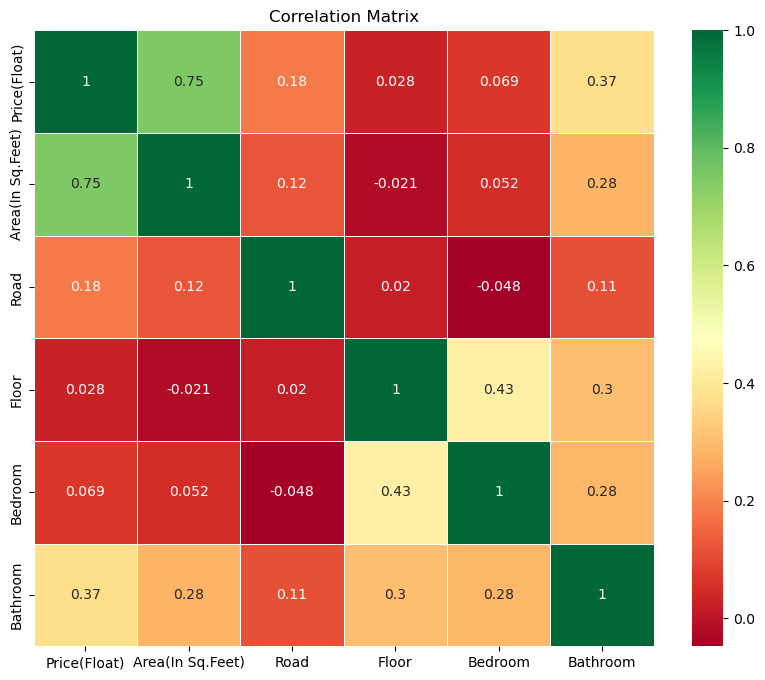

In [30]:
df = pd.read_csv('ss.csv')

# Assuming you have a DataFrame called 'dataset' containing your data
correlation_matrix = df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.title('Correlation Matrix')

# Display the plot
plt.show()

C:\Users\mshar\AppData\Local\Temp\ipykernel_6976\928764137.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


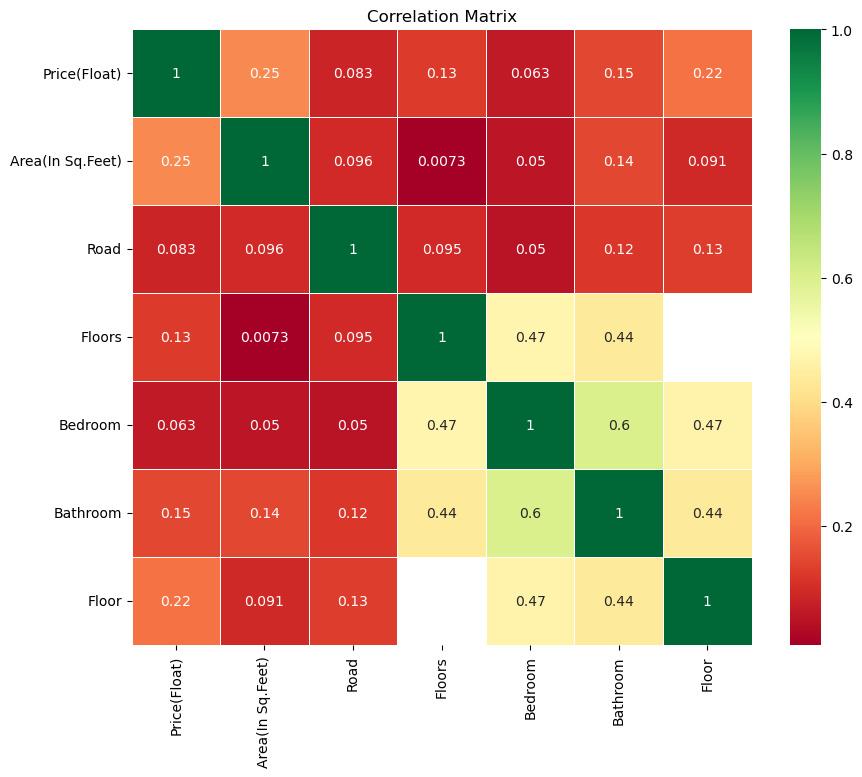

In [32]:
df = pd.read_csv('mergedd.csv')


# Assuming you have a DataFrame called 'dataset' containing your data
correlation_matrix = df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [35]:
dataset = pd.read_csv('mergedd.csv')
# Assuming you have a DataFrame called 'dataset' containing your data
# Select the numeric columns where you want to remove outliers

numeric_columns = ['Price(Float)', 'Bedroom', 'Bathroom', 'Area(In Sq.Feet)']

# Calculate the IQR for each numeric column
Q1 = dataset[numeric_columns].quantile(0.25)
Q3 = dataset[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
dataset_no_outliers = dataset[
    (dataset[numeric_columns] >= lower_bound) & (dataset[numeric_columns] <= upper_bound)
].dropna(how='any')

# Save the modified dataset without outliers to a new CSV file
dataset_no_outliers.to_csv('dataset_no_outliers.csv', index=False)